## Importing required Libraries:

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for inserting images in notebook:
from IPython.display import Image

# setting options to show maximum of row and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# disabling Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# A cycle of Sepsis Spreading in human body:

Image(url="sepsis.PNG", width=550, height=550)

* Sepsis is an organ failure disease caused by an infection resulting in extremely high mortality.
* Sepsis is a serious condition in which the body responds improperly to an infection.
* The infection-fighting processes turn on the body, causing the organs to work poorly.
* Sepsis may progress to septic shock. This is a dramatic drop in blood pressure that can damage the lungs,kidneys, liver and other vital organs. 
* When the damage is severe, it can lead to mortality. 

* sepsis refers to an out-of-control body reaction caused by infection
* Sepsis can progress to septic shock when certain changes in the circulatory system,

* the body's cell and how the body uses energy become more abnormal.
* Septic shock is more likely to cause death than sepsis is.

* In 2017, there were 48.9 million sepsis cases worldwide, of which 11 million died of infection, and the mortality rate was as high as 20%. 

* Sepsis is a clinical syndrome of life-threating organ dysfunction caused by a dysregulated response to infection.
* In septic shock, there is critical reduction in tissue perfusion; acute failures in multiple organs, including lungs, kidneys and liver can occur.

#### Rule-based sepsis scoring systems are usually used in clinical settings, including:

* -->systemic inflammatory response syndrome (SIRS) criteria
* -->sequential organ failure assessment (SOFA) scores, and 
* -->modified early warning score (MEWS), to alert the possible occurrence of sepsis.


The main challenges :-
    
in order to predict sepsis in advance, it is also crucial to choose 
appropriate variables and design valuable algorithms in the clinical setting.

The input variables of the model are physiological indicators and the output 
variable is whether the patient would suffer from sepsis several hours later. 

Specifically, the input variables generally include vital signs like heart rate, 
oxygen saturation, and body temperature; biomarkers like procalcitonin and 
interleukin-6; laboratory values like bicarbonate and creatinine; and demographic 
variables like sex and age. 

In most cases, the variables include lots of missing values, such as that in 
MIMIC III (Intensive Care Medical Information Market Database), which has been used in 
many studies. Among most researches, variables with lots of missing values are excluded 
from predictors, so valuable information may be lost as a result. 

Several studies use imputation and mean filling methods to fill in missing values, 
but this may also lead to selection bias or mixtures of confounding factors. 
The data preprocessing method needs to be considered according to the characteristics 
of different data sets.

In [3]:
# Importing data dictionary:

des=pd.read_csv('Parameter _detail_Dictionary.csv')
des

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None
3,demographic,Sepsis_status,None,binary,Whether the patient having sepsis during this ...,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,None
5,demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admi...,21.5
6,demographic,elective_surgery,None,binary,Whether the patient was admitted to the hospit...,0
7,demographic,ethnicity,None,string,The common national or cultural tradition whic...,Caucasian
8,demographic,gender,None,string,The genotypical sex of the patient,F
9,demographic,height,centimetres,numeric,The height of the person on unit admission,180


In [4]:
# Importing data:

df=pd.read_csv('sepsis_status.csv')

In [5]:
# shape of data (No of rows and columns):

df.shape

(91713, 186)

In [6]:
# Fetching a sample of the data:

df.sample(10)

,encounter_id,patient_id,hospital_id,septic_shock,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
73621,84813,111703,13,0,54.0,32.281187,0,Caucasian,M,177.8,Emergency Department,Accident & Emergency,708,admit,Med-Surg ICU,0.304861,0,102.05,3.9,108.0,203.01,0,0.0,NaN,27.0,1.53,1.00,1.0,4.0,0.0,1.0,161.0,116.0,38.0,1.0,177.0,27.8,27.8,313.0,7.51,50.0,149.0,39.7,2001.5424,1.0,17.10,84.0,78.0,93.0,84.0,93.0,84.0,106.0,68.0,110.0,104.0,121.0,105.0,121.0,105.0,29.0,12.0,100.0,95.0,180.0,160.0,165.0,158.0,165.0,158.0,39.8,37.1,84.0,84.0,87.0,87.0,87.0,87.0,106.0,106.0,104.0,104.0,109.0,109.0,109.0,109.0,22.0,22.0,100.0,100.0,160.0,160.0,158.0,158.0,158.0,158.0,39.5,39.3,3.9,3.9,NaN,NaN,27.0,21.0,8.5,7.8,1.53,0.93,161.0,90.0,NaN,NaN,14.4,12.9,42.7,38.0,1.4,1.4,1.6,1.1,327.0,298.0,3.4,2.4,149.0,145.0,17.10,15.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,116.0,NaN,NaN,14.3,14.3,42.0,42.0,1.4,1.4,1.6,1.6,NaN,NaN,2.6,2.5,149.0,148.0,NaN,NaN,28.9,24.9,7.53,7.47,313.0,101.0,330.000000,202.000000,24.9,24.9,7.53,7.53,101.0,101.0,202.0,202.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [7]:
# basic data info:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [8]:
# Defining required function definitions:

# function that fetch categorical columns from the dataframe provided as the arguement in the function definition:
def num_cols(df):
    return df.select_dtypes(exclude='object').columns

# function that fetch numerical columns from the dataframe provided as the arguement in the function definition:
def cat_cols(df):
    return df.select_dtypes(include='object').columns

# defining a function that will fetch the columns which have null values as index and the values, percentage of values and datatype as values:
# the function will return a series object:

def Null(df):
    return pd.Series([[df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)[i],
  str(np.round(df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)[i]*100/len(df),2))+' %',
  df[i].dtype] for i in df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False).index],
              index=[i for i in df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False).index])
    

In [9]:
# Datatype of the features:

df.dtypes

encounter_id                        int64
patient_id                          int64
hospital_id                         int64
septic_shock                        int64
age                               float64
bmi                               float64
elective_surgery                    int64
ethnicity                          object
gender                             object
height                            float64
hospital_admit_source              object
icu_admit_source                   object
icu_id                              int64
icu_stay_type                      object
icu_type                           object
pre_icu_los_days                  float64
readmission_status                  int64
weight                            float64
albumin_apache                    float64
apache_2_diagnosis                float64
apache_3j_diagnosis               float64
apache_post_operative               int64
arf_apache                        float64
bilirubin_apache                  

In [10]:
# fetching the features which have null values:

Null(df)

h1_bilirubin_max                  [84619, 92.27 %, float64]
h1_bilirubin_min                  [84619, 92.27 %, float64]
h1_lactate_min                    [84369, 91.99 %, float64]
h1_lactate_max                    [84369, 91.99 %, float64]
h1_albumin_max                     [83824, 91.4 %, float64]
h1_albumin_min                     [83824, 91.4 %, float64]
h1_pao2fio2ratio_min              [80195, 87.44 %, float64]
h1_pao2fio2ratio_max              [80195, 87.44 %, float64]
h1_arterial_ph_min                [76424, 83.33 %, float64]
h1_arterial_ph_max                [76424, 83.33 %, float64]
h1_hco3_min                       [76094, 82.97 %, float64]
h1_hco3_max                       [76094, 82.97 %, float64]
h1_arterial_pco2_min              [75959, 82.82 %, float64]
h1_arterial_pco2_max              [75959, 82.82 %, float64]
h1_wbc_max                        [75953, 82.82 %, float64]
h1_wbc_min                        [75953, 82.82 %, float64]
h1_arterial_po2_max               [75945

* we have either more than 50% missing value or less than 25% missing value
* approach -- drop the columns having more than 50% missing value
* drop the rows having rest of the misisng values 

In [11]:
s=Null(df)

In [12]:
# dropping the columns having more than 50% missing value:
# Use a list comprehension with conditional statement to fetch the columns:

df.drop([i for i in s.index if float(s[i][1][0:len(s[i][1])-2])>50],axis=1,inplace=True)

In [13]:
# dropping the rows having rest of the misisng values:

df.dropna(axis=0,inplace=True)

In [14]:
# New shape of data:

df.shape

(27795, 112)

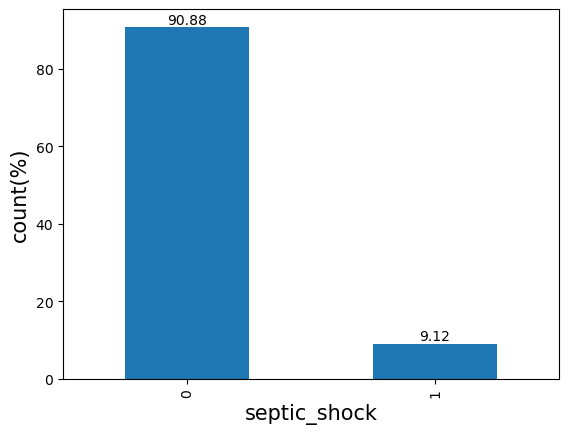

In [15]:
# septic_shock is our target variable:
# value_counts(%) of target():

ax=(df.septic_shock.value_counts(normalize=True)*100).plot(kind='bar')

for j in ax.containers:
    ax.bar_label(j,fmt='%.2f')
    
plt.xlabel('septic_shock',fontsize=15)
plt.ylabel('count(%)',fontsize=15)
plt.show()

#### Let's visualize the value counts of target with respect to some important features:

<AxesSubplot:xlabel='septic_shock', ylabel='count'>

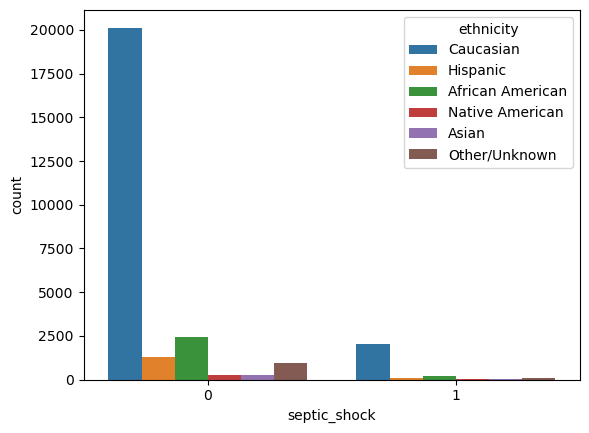

In [16]:
# Value Counts of Target with respect to ehnicity:

sns.countplot(x="septic_shock",data=df,hue="ethnicity")

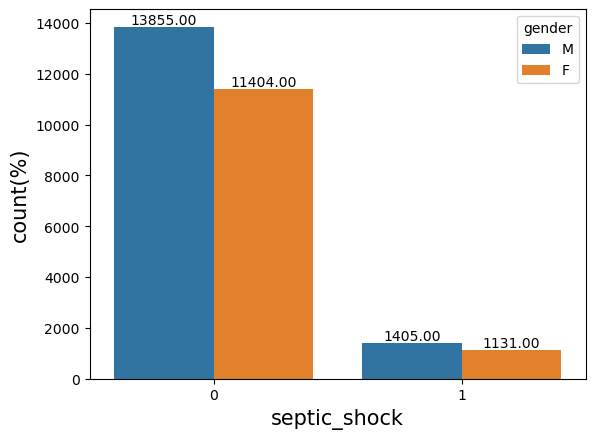

In [17]:
# Value Counts of Target with respect to gender:

ax=sns.countplot(x="septic_shock",data=df,hue="gender")

for j in ax.containers:
    ax.bar_label(j,fmt='%.2f')
    
plt.xlabel('septic_shock',fontsize=15)
plt.ylabel('count(%)',fontsize=15)
plt.show()

<AxesSubplot:xlabel='septic_shock', ylabel='count'>

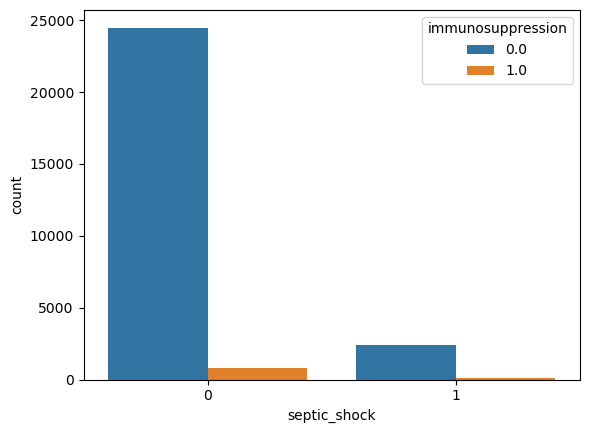

In [18]:
# Value Counts of Target with respect to immunosuppression:

sns.countplot(x="septic_shock",data=df,hue="immunosuppression")

<AxesSubplot:xlabel='septic_shock', ylabel='count'>

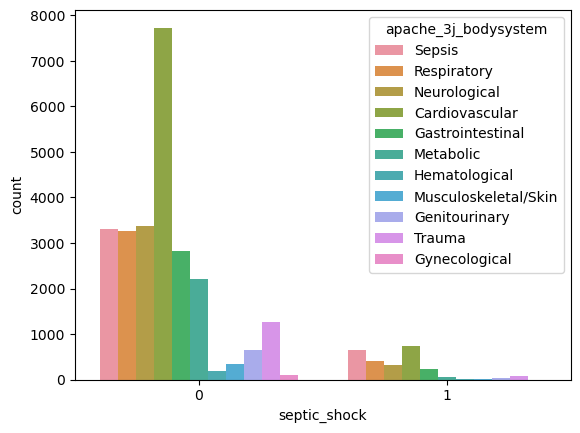

In [19]:
# Value Counts of Target with respect to apache_3j_bodysystem:

sns.countplot(x="septic_shock",data=df,hue="apache_3j_bodysystem")

<AxesSubplot:xlabel='septic_shock', ylabel='count'>

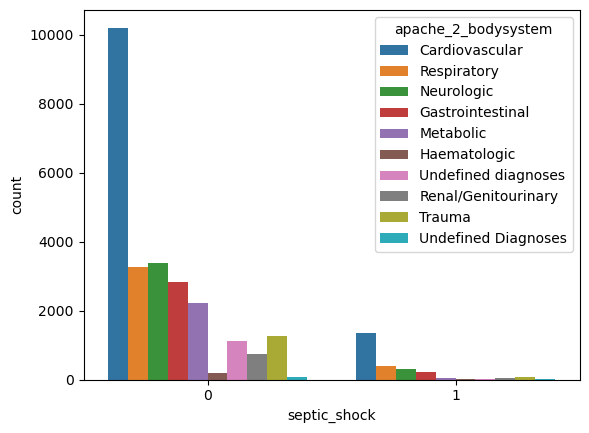

In [20]:
# Value Counts of Target with respect to apache_2_bodysystem:

sns.countplot(x="septic_shock",data=df,hue="apache_2_bodysystem")

In [21]:
# feching a series of number of unique values and its corresponding features as index:

pd.Series([df[i].nunique() for i in df.columns],index=df.columns)

encounter_id                      27795
patient_id                        27795
hospital_id                         119
septic_shock                          2
age                                  74
bmi                               16993
elective_surgery                      2
ethnicity                             6
gender                                2
height                              271
hospital_admit_source                15
icu_admit_source                      5
icu_id                              198
icu_stay_type                         3
icu_type                              8
pre_icu_los_days                   4637
readmission_status                    1
weight                             2447
apache_2_diagnosis                   44
apache_3j_diagnosis                 363
apache_post_operative                 2
arf_apache                            2
bun_apache                          195
creatinine_apache                   938
gcs_eyes_apache                       4


In [22]:
# Fetching the columns which have only 1 unique value:

for i in [i for i in df.columns if df[i].nunique()==1]:
    print(i,'--->',df[i].unique())

readmission_status ---> [0]
gcs_unable_apache ---> [0.]


In [23]:
# Dropping readmission_status and gcs_unable_apache features from df:

df.drop([i for i in df.columns if df[i].nunique()==1],axis=1,inplace=True)

In [24]:
# Fetching the columns which have only 2 unique value:

for i in [i for i in df.columns if df[i].nunique()==2]:
    print(i,'--->',df[i].unique(),'dtype:',df[i].dtype)

septic_shock ---> [0 1] dtype: int64
elective_surgery ---> [0 1] dtype: int64
gender ---> ['M' 'F'] dtype: object
apache_post_operative ---> [0 1] dtype: int64
arf_apache ---> [0. 1.] dtype: float64
intubated_apache ---> [0. 1.] dtype: float64
ventilated_apache ---> [0. 1.] dtype: float64
aids ---> [0. 1.] dtype: float64
cirrhosis ---> [0. 1.] dtype: float64
diabetes_mellitus ---> [1. 0.] dtype: float64
hepatic_failure ---> [0. 1.] dtype: float64
immunosuppression ---> [0. 1.] dtype: float64
leukemia ---> [0. 1.] dtype: float64
lymphoma ---> [0. 1.] dtype: float64
solid_tumor_with_metastasis ---> [0. 1.] dtype: float64


In [25]:
# Fetching the unique values of categorical columns:

for i in cat_cols(df):
    print(i,'--->',df[i].unique())

ethnicity ---> ['Caucasian' 'Hispanic' 'African American' 'Native American' 'Asian'
 'Other/Unknown']
gender ---> ['M' 'F']
hospital_admit_source ---> ['Floor' 'Direct Admit' 'Emergency Department' 'Operating Room'
 'Other Hospital' 'ICU to SDU' 'Other ICU' 'Chest Pain Center'
 'Recovery Room' 'Step-Down Unit (SDU)' 'Acute Care/Floor' 'PACU'
 'Observation' 'ICU' 'Other']
icu_admit_source ---> ['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU']
icu_stay_type ---> ['admit' 'readmit' 'transfer']
icu_type ---> ['CTICU' 'Med-Surg ICU' 'MICU' 'CCU-CTICU' 'Neuro ICU' 'SICU'
 'Cardiac ICU' 'CSICU']
apache_3j_bodysystem ---> ['Sepsis' 'Respiratory' 'Neurological' 'Cardiovascular' 'Gastrointestinal'
 'Metabolic' 'Hematological' 'Musculoskeletal/Skin' 'Genitourinary'
 'Trauma' 'Gynecological']
apache_2_bodysystem ---> ['Cardiovascular' 'Respiratory' 'Neurologic' 'Gastrointestinal'
 'Metabolic' 'Haematologic' 'Undefined diagnoses' 'Renal/Genitourinary'
 'Trau

In [26]:
# Groupby functin to calculate value count(%) with respect to the categorical features:

for i in cat_cols(df):
    print(np.round(df.groupby(i)['septic_shock'].value_counts(normalize=True)*100,2))
    print('\t')
    print('*****'*15)
    print('\t')

ethnicity         septic_shock
African American  0               91.63
                  1                8.37
Asian             0               90.81
                  1                9.19
Caucasian         0               90.75
                  1                9.25
Hispanic          0               91.55
                  1                8.45
Native American   0               87.54
                  1               12.46
Other/Unknown     0               91.83
                  1                8.17
Name: septic_shock, dtype: float64
	
***************************************************************************
	
gender  septic_shock
F       0               90.98
        1                9.02
M       0               90.79
        1                9.21
Name: septic_shock, dtype: float64
	
***************************************************************************
	
hospital_admit_source  septic_shock
Acute Care/Floor       0                90.07
                       1            

In [27]:
# Fetching the data description of identifier variables:

des[des.Category=='identifier']

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None


In [28]:
num_cols(df)

Index(['encounter_id', 'patient_id', 'hospital_id', 'septic_shock', 'age',
       'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days',
       ...
       'apache_4a_hospital_sepsis_prob', 'apache_4a_icu_sepsis_prob', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object', length=102)

## Correltaion:

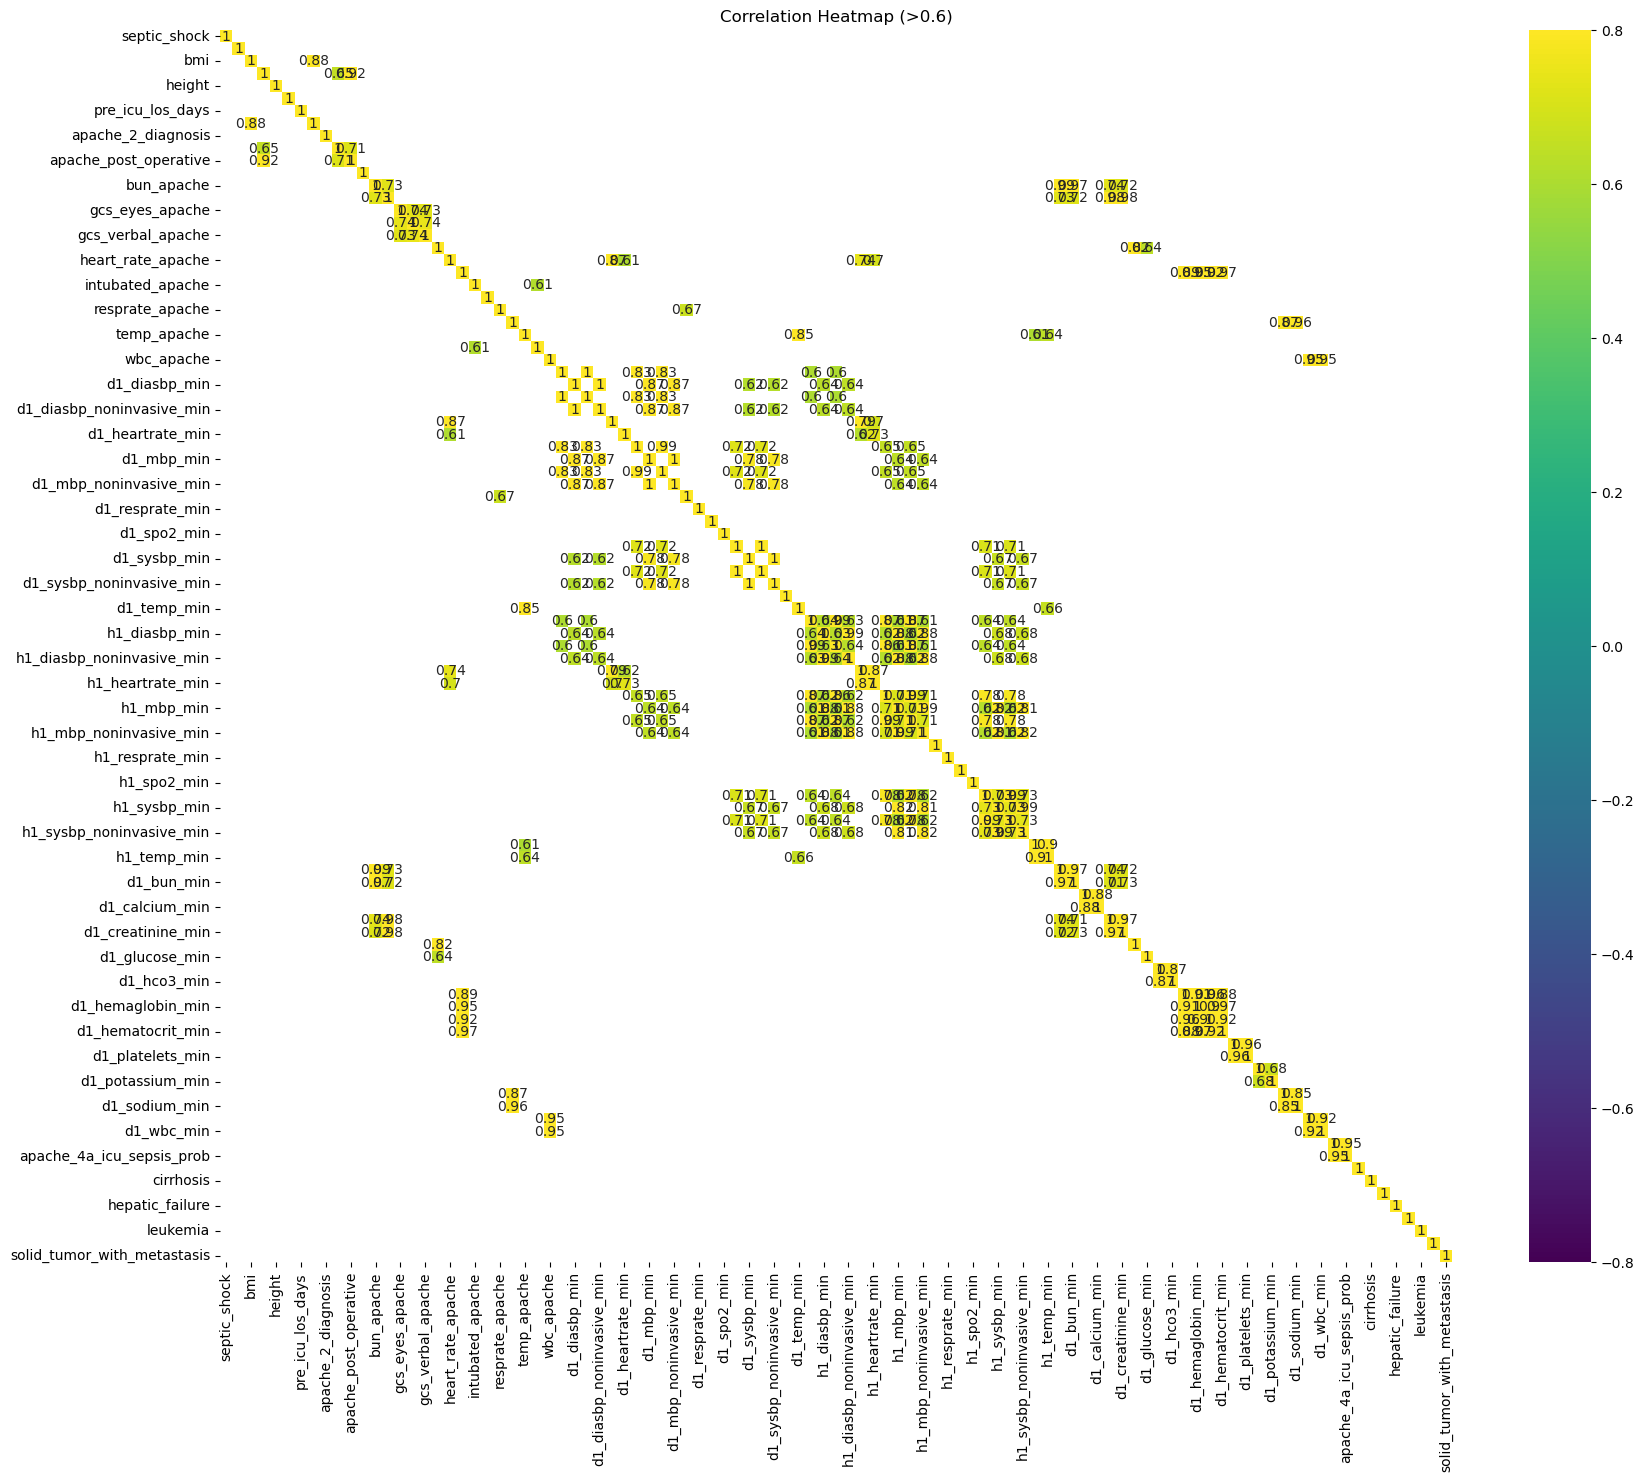

In [29]:
# Creating a mask for correlations greater than 0.6 or less than -0.6

corr_matrix = df[num_cols(df)[3:]].corr(method="spearman")

# Create a mask for correlations greater than 0.5 or less than -0.5
mask = (corr_matrix > 0.6) | (corr_matrix < -0.6)


plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix[mask], vmin=-0.8, vmax=0.8, square=True, annot=True, cmap='viridis')

plt.title("Correlation Heatmap (>0.6)")
plt.show()


## model building:

In [65]:
# Importing required packages:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report,accuracy_score,log_loss,roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay,precision_recall_curve,roc_auc_score,roc_curve

* We will use pipeline and column transformer for prediction.

In [42]:
num_cols(df)

Index(['encounter_id', 'patient_id', 'hospital_id', 'septic_shock', 'age',
       'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days',
       ...
       'apache_4a_hospital_sepsis_prob', 'apache_4a_icu_sepsis_prob', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object', length=102)

In [44]:
# Extraction of Features and Target from df:

X=df.drop(['encounter_id', 'patient_id', 'hospital_id', 'septic_shock'],axis=1)
y=df['septic_shock']

In [45]:
# train_test_split:

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=df['septic_shock'], test_size=0.2,random_state=42)

In [46]:
# Label:
Label=[1,0]

In [82]:
# Preprocessor:
# These preprocessor will take X_train and X_test an perform scaling to the numerical columns
# And One_hot encoding to categorical Columns:

numeric_features = num_cols(df)[4:].tolist()
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

categorical_features = cat_cols(df).tolist()
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(drop='first',sparse=False,handle_unknown="ignore"))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)



In [ ]:
# modeling with pipeline:

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())])

In [69]:
# Creating a function definition for prediction using pipeline:

def Pipe_Prediction(X_train,X_test,y_train,y_test,model,Label):

    numeric_features = num_cols(df)[4:].tolist()
    numeric_transformer = Pipeline(
        steps=[("scaler", MinMaxScaler())]
    )
    
    categorical_features = cat_cols(df).tolist()
    categorical_transformer = Pipeline(
        steps=[
            ("encoder", OneHotEncoder(drop='first',sparse=False,handle_unknown="ignore"))
        ]
    )
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features)
        ]
    )


    for i in model:
        
        clf = Pipeline(
            steps=[("preprocessor", preprocessor), ("classifier", i)])
    
        # fitting:
        clf.fit(X_train, y_train)
        
        print(f'{i} : ')
        print('\t')
        
    
        
        # prediction:
        y_train_pred=clf.predict(X_train)
        y_test_pred=clf.predict(X_test)
        
        # accuracy_score(%):
        print('Accuracy_Score of Train: ',np.round(accuracy_score(y_train,y_train_pred)*100,2),'%')
        print('Accuracy_Score of Test: ',np.round(accuracy_score(y_test,y_test_pred)*100,2),'%')
        print('\t')
        print('ROC_AUC_Score of Train: ',np.round(roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])*100,2),'%')
        print('ROC_AUC_Score of Test: ',np.round(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])*100,2),'%')
        print('\t')
        print('Log_Loss of Train: ',np.round(log_loss(y_train,clf.predict_proba(X_train))*100,2),'%')
        print('Log_Loss of Test: ',np.round(log_loss(y_test,clf.predict_proba(X_test))*100,2),'%')
        print('\t')
        # Defining a function which will return a dataframe of confusion matrix:
        def Confusion_Matrix(y_train,y_train_pred,Label):
            return pd.DataFrame(confusion_matrix(y_train,y_train_pred,labels=Label),
                                columns=['predicted_'+str(i) for i in Label],index=['Actual_'+str(i) for i in Label])
        
        print('Train Confusion_Matrix:')
        print('\t')
        # Train Confusion_Matrix:
        print(Confusion_Matrix(y_train,y_train_pred,Label))
        print('\t')
        print('Test Confusion_Matrix:')
        print('\t')
        # Test Confusion_Matrix:
        print(Confusion_Matrix(y_test,y_test_pred,Label))
        print('\t')
        
        print('Train Classification Report:')
        print('\t')
        # Train Classification Report:
        print(classification_report(y_train,y_train_pred,labels=Label))
        print('\t')
        print('Test Classification Report:')
        print('\t')
        # Test Classification Report:
        print(classification_report(y_test,y_test_pred,labels=Label))
        print('\t')
        print('*****'*15)
        print('\t')
    

In [74]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),
       SVC(probability=True),xgb.XGBClassifier(),lgb.LGBMClassifier()]

In [70]:
# Prediction:

Pipe_Prediction(X_train,X_test,y_train,y_test,models,Label)

LogisticRegression() : 
	
Accuracy_Score of Train:  92.18 %
Accuracy_Score of Test:  92.19 %
	
ROC_AUC_Score of Train:  88.23 %
ROC_AUC_Score of Test:  87.28 %
	
Log_Loss of Train:  20.77 %
Log_Loss of Test:  21.22 %
	
Train Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1          603         1426
Actual_0          312        19895
	
Test Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1          143          364
Actual_0           70         4982
	
Train Classification Report:
	
              precision    recall  f1-score   support

           1       0.66      0.30      0.41      2029
           0       0.93      0.98      0.96     20207

    accuracy                           0.92     22236
   macro avg       0.80      0.64      0.68     22236
weighted avg       0.91      0.92      0.91     22236

	
Test Classification Report:
	
              precision    recall  f1-score   support

           1       0.67      0.28      0.40       507
           0     

* Most of the 1 is getting predicted as 0, as 1 stands for the patients having septic_shock; the algorithms performance is very poor.

In [75]:
# hyperparameter tuning:

models2=[LogisticRegression(class_weight='balanced'),DecisionTreeClassifier(class_weight='balanced'),
        RandomForestClassifier(class_weight='balanced'),KNeighborsClassifier(weights='distance'),
        BaggingClassifier(bootstrap_features=True),GradientBoostingClassifier(criterion='squared_error'),
        AdaBoostClassifier(),SVC(probability=True,kernel='linear',class_weight='balanced'),
        xgb.XGBClassifier(),lgb.LGBMClassifier()]

In [76]:
# Prediction with the hyperparameter tuned:

Pipe_Prediction(X_train,X_test,y_train,y_test,models2,Label)

LogisticRegression(class_weight='balanced') : 
	
Accuracy_Score of Train:  81.57 %
Accuracy_Score of Test:  81.26 %
	
ROC_AUC_Score of Train:  88.53 %
ROC_AUC_Score of Test:  87.2 %
	
Log_Loss of Train:  43.49 %
Log_Loss of Test:  43.37 %
	
Train Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1         1584          445
Actual_0         3654        16553
	
Test Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1          383          124
Actual_0          918         4134
	
Train Classification Report:
	
              precision    recall  f1-score   support

           1       0.30      0.78      0.44      2029
           0       0.97      0.82      0.89     20207

    accuracy                           0.82     22236
   macro avg       0.64      0.80      0.66     22236
weighted avg       0.91      0.82      0.85     22236

	
Test Classification Report:
	
              precision    recall  f1-score   support

           1       0.29      0.76      0.42      

* After the hyper parameter tuning, the rate of 1 correctly classified is greater than misclassified.
* For Logistic: 1--->1: 1584 out of 2029 for train and 383 out of 507 for test.
* For svc: 1--->1: 1604 out of 2029 for train and 385 out of 507 for test.

In [77]:
# Prediction with the hyperparameter tuned (taking only LogisticRegression and SVC):

Pipe_Prediction(X_train,X_test,y_train,y_test,[LogisticRegression(class_weight='balanced'),
                                              SVC(probability=True,kernel='linear',class_weight='balanced')],Label)

LogisticRegression(class_weight='balanced') : 
	
Accuracy_Score of Train:  81.57 %
Accuracy_Score of Test:  81.26 %
	
ROC_AUC_Score of Train:  88.53 %
ROC_AUC_Score of Test:  87.2 %
	
Log_Loss of Train:  43.49 %
Log_Loss of Test:  43.37 %
	
Train Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1         1584          445
Actual_0         3654        16553
	
Test Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1          383          124
Actual_0          918         4134
	
Train Classification Report:
	
              precision    recall  f1-score   support

           1       0.30      0.78      0.44      2029
           0       0.97      0.82      0.89     20207

    accuracy                           0.82     22236
   macro avg       0.64      0.80      0.66     22236
weighted avg       0.91      0.82      0.85     22236

	
Test Classification Report:
	
              precision    recall  f1-score   support

           1       0.29      0.76      0.42      

* Logistic Regression and SVM are perform efficiently than other algorithms. So from now on we will continue with these two algorithms only.

In [85]:
# modeling with pipeline for calculating Precision-Recall Curve and Roc_Auc Curve:

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(class_weight='balanced'))])

# fitting:
clf.fit(X_train, y_train)

# prediction:
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

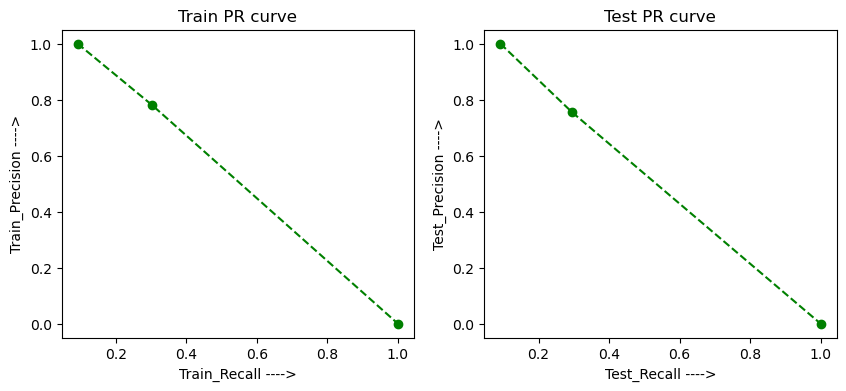

In [86]:
# Precision-Recall Curve of Train and Test:

plt.figure(figsize=(10,4),dpi=100)

train_precision, train_recall, train_thresholds = precision_recall_curve(y_train, y_train_pred)
test_precision, test_recall, test_thresholds = precision_recall_curve(y_test, y_test_pred)

plt.subplot(1,2,1)
plt.plot(train_precision,train_recall,color='green', marker='o', linestyle='dashed')
plt.ylabel("Train_Precision ---->")
plt.xlabel("Train_Recall ---->")
plt.title("Train PR curve")

plt.subplot(1,2,2)
plt.plot(test_precision,test_recall,color='green', marker='o', linestyle='dashed')
plt.ylabel("Test_Precision ---->")
plt.xlabel("Test_Recall ---->")
plt.title("Test PR curve")

plt.show()

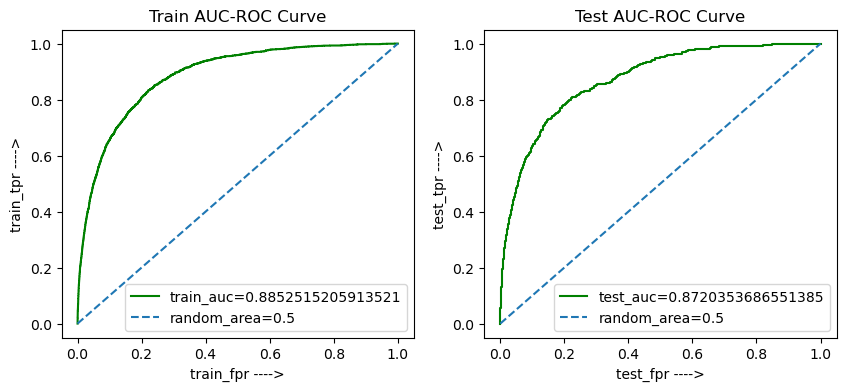

In [89]:
# AUC-ROC Curve of Train and Test:

plt.figure(figsize=(10,4),dpi=100)

train_fpr, train_tpr, train_thresholds= roc_curve(y_train,  clf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, test_thresholds= roc_curve(y_test,  clf.predict_proba(X_test)[:,1])

train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

plt.subplot(1,2,1)
plt.plot(train_fpr,train_tpr,label="train_auc="+str(train_auc),color='green')
plt.plot([0,1],[0,1],label='random_area='+str(0.5),linestyle='--')
plt.legend(loc=4)
plt.title("Train AUC-ROC Curve")
plt.xlabel("train_fpr ---->")
plt.ylabel("train_tpr ---->")

plt.subplot(1,2,2)
plt.plot(test_fpr,test_tpr,label="test_auc="+str(test_auc),color='green')
plt.plot([0,1],[0,1],label='random_area='+str(0.5),linestyle='--')
plt.legend(loc=4)
plt.title("Test AUC-ROC Curve")
plt.xlabel("test_fpr ---->")
plt.ylabel("test_tpr ---->")

plt.show()

* Overall Performance is good enough.

In [90]:
# Prediction with the ddifferent hyperparameter tuning (taking only LogisticRegression and SVC):

Pipe_Prediction(X_train,X_test,y_train,y_test,[LogisticRegression(class_weight='balanced',solver='liblinear'),
                                              SVC(probability=True,kernel='sigmoid',class_weight='balanced')],Label)

LogisticRegression(class_weight='balanced', solver='liblinear') : 
	
Accuracy_Score of Train:  81.53 %
Accuracy_Score of Test:  81.26 %
	
ROC_AUC_Score of Train:  88.53 %
ROC_AUC_Score of Test:  87.2 %
	
Log_Loss of Train:  43.46 %
Log_Loss of Test:  43.36 %
	
Train Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1         1578          451
Actual_0         3656        16551
	
Test Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1          383          124
Actual_0          918         4134
	
Train Classification Report:
	
              precision    recall  f1-score   support

           1       0.30      0.78      0.43      2029
           0       0.97      0.82      0.89     20207

    accuracy                           0.82     22236
   macro avg       0.64      0.80      0.66     22236
weighted avg       0.91      0.82      0.85     22236

	
Test Classification Report:
	
              precision    recall  f1-score   support

           1       0.29      

#### Best models for now:

* LogisticRegression(class_weight='balanced')
* SVC(probability=True,kernel='linear',class_weight='balanced')

## Feature Selection:

In [91]:
# looking for duplicate rows in df:

df.duplicated().sum()

0

* No duplicate rows present in data.

In [92]:
# Defining a function to fetch duplicate features:

def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [94]:
df_duplicate_feature=get_duplicate_columns(df)
df_duplicate_feature

{}

* No duplicate features present in data.

### Varience threshold:

* The objective is to perfornm prediction without using the numerical features whoose varience are closer to 0.

In [96]:
for i in num_cols(X_train):
    print(i+':',X_train[i].var())
    print('\t')

age: 272.96469127728636
	
bmi: 67.59392054113628
	
elective_surgery: 0.15416216894925241
	
height: 114.07610629511007
	
icu_id: 50375.765377356634
	
pre_icu_los_days: 4.889529934943787
	
weight: 621.9380071393293
	
apache_2_diagnosis: 7200.878254297715
	
apache_3j_diagnosis: 219340.65134963827
	
apache_post_operative: 0.16996414932436718
	
arf_apache: 0.028674964270074245
	
bun_apache: 428.3201533529094
	
creatinine_apache: 2.4334803238171068
	
gcs_eyes_apache: 0.9776668061036415
	
gcs_motor_apache: 1.815600207566124
	
gcs_verbal_apache: 2.5430724392299213
	
glucose_apache: 7940.929785638206
	
heart_rate_apache: 956.3968340499451
	
hematocrit_apache: 46.247674890182836
	
intubated_apache: 0.14160681744529083
	
map_apache: 1883.8403083802996
	
resprate_apache: 215.794556959941
	
sodium_apache: 26.212264988133764
	
temp_apache: 0.777566694092797
	
ventilated_apache: 0.22873964645178277
	
wbc_apache: 47.57436437042554
	
d1_diasbp_max: 375.49388355945143
	
d1_diasbp_min: 153.06526890858933

In [105]:
# Calculating the features whoose varience is >0.1

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.1)

In [106]:
# fitting

sel.fit(X_train[num_cols(X_train)])

VarianceThreshold(threshold=0.1)

In [107]:
sum(sel.get_support())

88

* The varience of these features are greater than 0.1. We will take only these features for further prediction.

In [110]:
# Fetching the features which are above varience threshold:

high_var_cols=num_cols(X_train)[sel.get_support()]
high_var_cols

Index(['age', 'bmi', 'elective_surgery', 'height', 'icu_id',
       'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'bun_apache',
       'creatinine_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache',
       'hematocrit_apache', 'intubated_apache', 'map_apache',
       'resprate_apache', 'sodium_apache', 'temp_apache', 'ventilated_apache',
       'wbc_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_d

In [98]:
# Defining a function definition which takes a list numerical and categorical features as arguements
# and constructs a preprocessor for Train and test data:

def Preprocessor(num_cols,cat_cols):

    # Preprocessor:
    numeric_features = num_cols
    numeric_transformer = Pipeline(
        steps=[("scaler", MinMaxScaler())]
    )
    
    categorical_features = cat_cols
    categorical_transformer = Pipeline(
        steps=[
            ("encoder", OneHotEncoder(drop='first',sparse=False,handle_unknown="ignore"))
        ]
    )
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features)
        ]
    )

    return preprocessor

    

In [114]:
# List Concatenation:
# Agenda is to use these columns to prediction:

high_var_cols.tolist()+cat_cols(X_train).tolist()

['age',
 'bmi',
 'elective_surgery',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartr

In [113]:
Preprocessor(high_var_cols,cat_cols(X_train))

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 Index(['age', 'bmi', 'elective_surgery', 'height', 'icu_id',
       'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'bun_apache',
       'creatinine_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_verbal_apache', 'glucose_apache', 'heart_ra...
       'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min',
       'diabetes_mellitus'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object'))])

In [116]:
# modeling with pipeline and high varienced features with Logistic Regression:

clf = Pipeline(
    steps=[("preprocessor", Preprocessor(high_var_cols,cat_cols(X_train))), ("classifier", LogisticRegression(class_weight='balanced'))])

# fitting:
clf.fit(X_train[high_var_cols.tolist()+cat_cols(X_train).tolist()], y_train)

# prediction:
y_train_pred=clf.predict(X_train[high_var_cols.tolist()+cat_cols(X_train).tolist()])
y_test_pred=clf.predict(X_test[high_var_cols.tolist()+cat_cols(X_train).tolist()])

In [117]:
# Defining a function which will return a dataframe of confusion matrix:
def Confusion_Matrix(y_train,y_train_pred,Label):
    return pd.DataFrame(confusion_matrix(y_train,y_train_pred,labels=Label),
                        columns=['predicted_'+str(i) for i in Label],index=['Actual_'+str(i) for i in Label])

In [118]:
Confusion_Matrix(y_train,y_train_pred,Label)

,predicted_1,predicted_0
Actual_1,1595,434
Actual_0,4023,16184


In [119]:
Confusion_Matrix(y_test,y_test_pred,Label)

,predicted_1,predicted_0
Actual_1,388,119
Actual_0,1002,4050


In [ ]:
# Previous Logistic Regression result with tuned hyperparameters:

'''

Train Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1         1584          445
Actual_0         3654        16553
	
Test Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1          383          124
Actual_0          918         4134

'''

* Performance increased a bit.

In [120]:
# modeling with pipeline with SVC:

clf = Pipeline(
    steps=[("preprocessor", Preprocessor(high_var_cols,cat_cols(X_train))), ("classifier", SVC(probability=True,kernel='linear',class_weight='balanced'))])

# fitting:
clf.fit(X_train[high_var_cols.tolist()+cat_cols(X_train).tolist()], y_train)

# prediction:
y_train_pred=clf.predict(X_train[high_var_cols.tolist()+cat_cols(X_train).tolist()])
y_test_pred=clf.predict(X_test[high_var_cols.tolist()+cat_cols(X_train).tolist()])

In [121]:
Confusion_Matrix(y_train,y_train_pred,Label)

,predicted_1,predicted_0
Actual_1,1619,410
Actual_0,4123,16084


In [122]:
Confusion_Matrix(y_test,y_test_pred,Label)

,predicted_1,predicted_0
Actual_1,390,117
Actual_0,1049,4003


In [ ]:
# Previous SVC result with tuned hyperparameters:

'''

Train Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1         1604          425
Actual_0         3679        16528
	
Test Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1          385          122
Actual_0          938         4114

'''

* 1's misclassification rate is reduced. But 0's misclassification rate has increased slightly, but looking at the real time challenges 0's misclassification rate will not impac as much as 1's misclassification rate will do.

## Correlation based features:

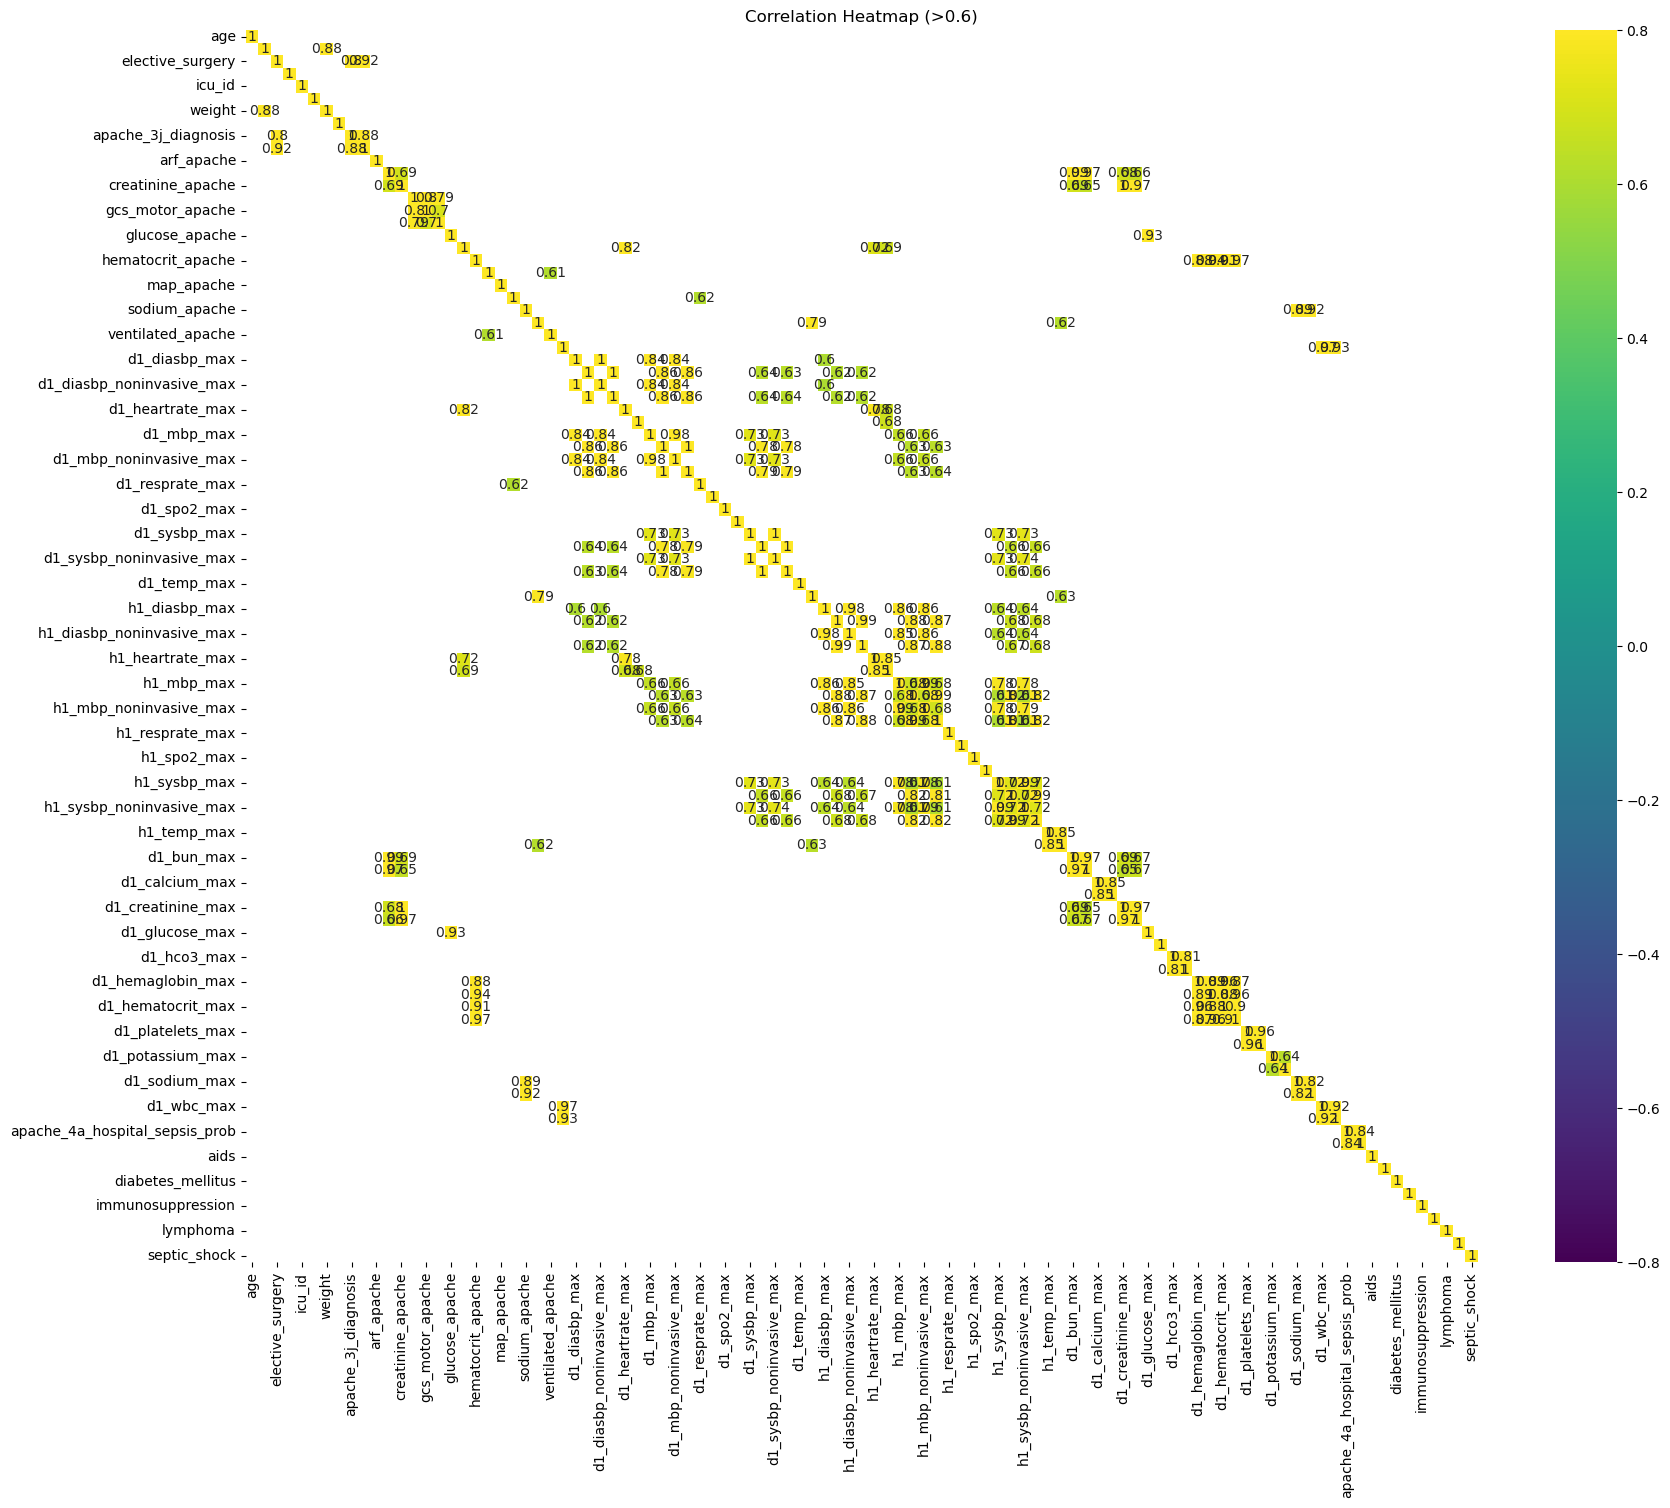

In [123]:
# Correlation for X_train:

# Creating a mask for correlations greater than 0.6 or less than -0.6

X_train['septic_shock']=y_train

corr_matrix = X_train.corr()

# Create a mask for correlations greater than 0.5 or less than -0.5
mask = (corr_matrix > 0.6) | (corr_matrix < -0.6)


plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix[mask], vmin=-0.8, vmax=0.8, square=True, annot=True, cmap='viridis')

plt.title("Correlation Heatmap (>0.6)")
plt.show()


In [124]:
# Get the column names of the DataFrame which has multicolinearity with other features:

columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)-1):
    for j in range(i + 1, len(columns)-1):

        if corr_matrix.loc[columns[i], columns[j]] > 0.6 or corr_matrix.loc[columns[i], columns[j]]< -0.6:
            columns_to_drop.append(columns[i])
            columns_to_drop.append(columns[j])
            if abs(corr_matrix.loc[columns[i], columns[-1]]) > abs(corr_matrix.loc[columns[j], columns[-1]]):
                columns_to_drop.remove(columns[j])
            else:
                columns_to_drop.remove(columns[i])



columns_to_drop=set(columns_to_drop)  
columns_to_drop=list(columns_to_drop)
print(len(columns_to_drop))

55


In [126]:
X_train.drop(['septic_shock'],axis=1,inplace=True)

In [127]:
'septic_shock' in X_train.columns

False

In [130]:
Preprocessor([i for i in num_cols(X_train) if i not in columns_to_drop],cat_cols(X_train))

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['age', 'bmi', 'height', 'icu_id',
                                  'pre_icu_los_days', 'apache_2_diagnosis',
                                  'apache_post_operative', 'arf_apache',
                                  'gcs_verbal_apache', 'glucose_apache',
                                  'intubated_apache', 'map_apache',
                                  'resprate_apache', 'sodium_apache',
                                  'd1_heartrate_min', 'd1_mbp_max',
                                  'd1_resprate_min', 'd1_sp...
                                  'h1_spo2_max', 'h1_spo2_min', 'h1_temp_max',
                                  'd1_calcium_max', 'd1_creatinine_min',
                                  'd1_glucose_min', 'd1_hco3_max', ...]),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object'))])

In [131]:
# modeling with pipeline with Logistic Regression after reduction of multicolinearity:

clf = Pipeline(
    steps=[("preprocessor", Preprocessor([i for i in num_cols(X_train) if i not in columns_to_drop],cat_cols(X_train))), ("classifier", LogisticRegression(class_weight='balanced'))])

# fitting:
clf.fit(X_train[[i for i in num_cols(X_train) if i not in columns_to_drop]+cat_cols(X_train).tolist()], y_train)

# prediction:
y_train_pred=clf.predict(X_train[[i for i in num_cols(X_train) if i not in columns_to_drop]+cat_cols(X_train).tolist()])
y_test_pred=clf.predict(X_test[[i for i in num_cols(X_train) if i not in columns_to_drop]+cat_cols(X_train).tolist()])

In [132]:
Confusion_Matrix(y_train,y_train_pred,Label)

,predicted_1,predicted_0
Actual_1,1533,496
Actual_0,3645,16562


In [133]:
Confusion_Matrix(y_test,y_test_pred,Label)

,predicted_1,predicted_0
Actual_1,371,136
Actual_0,915,4137


* Performance reduced for Logistic.

In [ ]:
X_train[high_var_cols]

In [134]:
# modeling with pipeline with Logistic Regression after reduction of multicolinearity:

clf = Pipeline(
    steps=[("preprocessor", Preprocessor([i for i in num_cols(X_train) if i not in columns_to_drop],cat_cols(X_train))), ("classifier", SVC(probability=True,kernel='linear',class_weight='balanced'))])

# fitting:
clf.fit(X_train[[i for i in num_cols(X_train) if i not in columns_to_drop]+cat_cols(X_train).tolist()], y_train)

# prediction:
y_train_pred=clf.predict(X_train[[i for i in num_cols(X_train) if i not in columns_to_drop]+cat_cols(X_train).tolist()])
y_test_pred=clf.predict(X_test[[i for i in num_cols(X_train) if i not in columns_to_drop]+cat_cols(X_train).tolist()])

In [135]:
Confusion_Matrix(y_train,y_train_pred,Label)

,predicted_1,predicted_0
Actual_1,1525,504
Actual_0,3370,16837


In [136]:
Confusion_Matrix(y_test,y_test_pred,Label)

,predicted_1,predicted_0
Actual_1,363,144
Actual_0,856,4196


* Performanced reduced for svc.

#### Let's predict by taking high varience features and from them reducing multicolinearity.

In [141]:
len(high_var_cols)

88

In [143]:
high_var_cols.tolist()

['age',
 'bmi',
 'elective_surgery',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartr

In [144]:
# Correlation on the high varience features for X_train:

X_train['septic_shock']=y_train

corr_matrix = X_train[high_var_cols.tolist()+['septic_shock']].corr()

In [145]:
# Get the column names of the DataFrame which has multicolinearity with other features:

columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)-1):
    for j in range(i + 1, len(columns)-1):

        if corr_matrix.loc[columns[i], columns[j]] > 0.6 or corr_matrix.loc[columns[i], columns[j]]< -0.6:
            columns_to_drop.append(columns[i])
            columns_to_drop.append(columns[j])
            if abs(corr_matrix.loc[columns[i], columns[-1]]) > abs(corr_matrix.loc[columns[j], columns[-1]]):
                columns_to_drop.remove(columns[j])
            else:
                columns_to_drop.remove(columns[i])



columns_to_drop=set(columns_to_drop)  
columns_to_drop=list(columns_to_drop)
print(len(columns_to_drop))

54


In [150]:
X_train.drop(['septic_shock'],axis=1,inplace=True)

In [151]:
'septic_shock' in X_train.columns

False

In [146]:
columns_to_drop

['d1_sysbp_noninvasive_max',
 'd1_calcium_min',
 'hematocrit_apache',
 'd1_diasbp_min',
 'd1_mbp_min',
 'd1_mbp_noninvasive_min',
 'weight',
 'h1_sysbp_noninvasive_max',
 'd1_hemaglobin_max',
 'h1_sysbp_max',
 'h1_heartrate_min',
 'h1_mbp_min',
 'bun_apache',
 'd1_heartrate_max',
 'temp_apache',
 'h1_sysbp_min',
 'd1_sysbp_noninvasive_min',
 'gcs_eyes_apache',
 'd1_sodium_max',
 'd1_hematocrit_min',
 'heart_rate_apache',
 'd1_sysbp_min',
 'd1_resprate_max',
 'd1_bun_max',
 'h1_mbp_noninvasive_max',
 'd1_bun_min',
 'd1_temp_min',
 'h1_diasbp_min',
 'h1_sysbp_noninvasive_min',
 'd1_hemaglobin_min',
 'd1_glucose_max',
 'd1_sodium_min',
 'wbc_apache',
 'apache_3j_diagnosis',
 'd1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'd1_wbc_max',
 'd1_diasbp_noninvasive_min',
 'd1_potassium_max',
 'd1_diasbp_max',
 'd1_hco3_min',
 'd1_platelets_min',
 'elective_surgery',
 'ventilated_apache',
 'd1_diasbp_noninvasive_max',
 'h1_diasbp_max',
 'h1_diasbp_noninvasive_max',
 'gcs_motor_apache',
 'h

In [148]:
[i for i in high_var_cols if i not in columns_to_drop]

['age',
 'bmi',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'apache_2_diagnosis',
 'apache_post_operative',
 'gcs_verbal_apache',
 'glucose_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_temp_max',
 'h1_diasbp_noninvasive_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_temp_max',
 'd1_calcium_max',
 'd1_creatinine_min',
 'd1_glucose_min',
 'd1_hco3_max',
 'd1_hematocrit_max',
 'd1_platelets_max',
 'd1_potassium_min',
 'd1_wbc_min',
 'diabetes_mellitus']

In [152]:
# modeling with pipeline with Logistic:

clf = Pipeline(
    steps=[("preprocessor", Preprocessor([i for i in high_var_cols if i not in columns_to_drop],cat_cols(X_train))), ("classifier", LogisticRegression(class_weight='balanced'))])

# fitting:
clf.fit(X_train[high_var_cols.tolist()+cat_cols(X_train).tolist()], y_train)

# prediction:
y_train_pred=clf.predict(X_train[[i for i in high_var_cols if i not in columns_to_drop]+cat_cols(X_train).tolist()])
y_test_pred=clf.predict(X_test[[i for i in high_var_cols if i not in columns_to_drop]+cat_cols(X_train).tolist()])

In [153]:
Confusion_Matrix(y_train,y_train_pred,Label)

,predicted_1,predicted_0
Actual_1,1544,485
Actual_0,4328,15879


In [154]:
Confusion_Matrix(y_test,y_test_pred,Label)

,predicted_1,predicted_0
Actual_1,383,124
Actual_0,1119,3933


* Performance remained same.

In [ ]:
# modeling with pipeline with Logistic:

clf = Pipeline(
    steps=[("preprocessor", Preprocessor([i for i in high_var_cols if i not in columns_to_drop],cat_cols(X_train))), ("classifier", SVC(probability=True,kernel='linear',class_weight='balanced'))])

# fitting:
clf.fit(X_train[high_var_cols.tolist()+cat_cols(X_train).tolist()], y_train)

# prediction:
y_train_pred=clf.predict(X_train[[i for i in high_var_cols if i not in columns_to_drop]+cat_cols(X_train).tolist()])
y_test_pred=clf.predict(X_test[[i for i in high_var_cols if i not in columns_to_drop]+cat_cols(X_train).tolist()])

In [ ]:
Confusion_Matrix(y_train,y_train_pred,Label)

In [ ]:
Confusion_Matrix(y_test,y_test_pred,Label)

In [177]:
# Calculating the features whoose varience is >1.

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=2)

In [178]:
# fitting

sel.fit(X_train[num_cols(X_train)])

VarianceThreshold(threshold=2)

In [179]:
sum(sel.get_support())

70

In [180]:
# Fetching the features which are above varience threshold:

high_var_cols2=num_cols(X_train)[sel.get_support()]
high_var_cols2

Index(['age', 'bmi', 'height', 'icu_id', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'bun_apache',
       'creatinine_apache', 'gcs_verbal_apache', 'glucose_apache',
       'heart_rate_apache', 'hematocrit_apache', 'map_apache',
       'resprate_apache', 'sodium_apache', 'wbc_apache', 'd1_diasbp_max',
       'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_diasbp_max',
       'h1_diasbp_min', 'h1_diasbp_noninvasive_max',
       'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min',
       'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max',
       'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min',
   

In [181]:
# modeling with pipeline with Logistic Regression:

clf = Pipeline(
    steps=[("preprocessor", Preprocessor(high_var_cols2,cat_cols(X_train))), ("classifier", LogisticRegression(class_weight='balanced'))])

# fitting:
clf.fit(X_train[high_var_cols2.tolist()+cat_cols(X_train).tolist()], y_train)

# prediction:
y_train_pred=clf.predict(X_train[high_var_cols2.tolist()+cat_cols(X_train).tolist()])
y_test_pred=clf.predict(X_test[high_var_cols2.tolist()+cat_cols(X_train).tolist()])

In [182]:
Confusion_Matrix(y_train,y_train_pred,Label)

,predicted_1,predicted_0
Actual_1,1568,461
Actual_0,4378,15829


In [183]:
Confusion_Matrix(y_test,y_test_pred,Label)

,predicted_1,predicted_0
Actual_1,386,121
Actual_0,1130,3922


Performance remained the same.

## Conclusion:

* Best Features ---> Numerical Features whoose varience are above the 0.1 threshold and all the categorical features.
* Best model ---> SVC(probability=True,kernel='linear',class_weight='balanced')

* Results of the moels given below for train and test data.

In [ ]:
# Train Confusion matrix:

'''
	   predicted_1	  predicted_0
Actual_1	1619	    410
Actual_0	4123	   16084

'''

In [ ]:
# Test Confusion matrix:

'''
	   predicted_1	   predicted_0
Actual_1	390	         117
Actual_0	1049	    4003

'''

* 1 ---> Patients having sepsis_shock.
* 0 ---> Patients not having sepsis_shock.

* From the confusion Matrix we can see that that the rate of actual 1 is getting predicted as 1 is 3-4 times for both the train and test data.
* The rate Actual 0 is getting preicted as 0 is higher than predicted as 1, but the rate of misclassification in 0 is greater than that of 1.
* But the misclassification of 0s will not impact in the real world scenario. If patients not having sepsis get predicted to have sepsis, they will be admitted in the hospital, whcih will not be that life threatening, compared to the patients having sepsis getting predicted as not having sepsis.
